In [21]:
import pandas as pd
import plotly.graph_objs as go

In [22]:
df = pd.read_csv('./data/cluster_faces.csv', index_col=0)
df.head()

,filepath,episode_id,frame_num,face_num,cluster,character,pct_of_frame,valid,filepath_local
0,/home/amos/datasets/CineFace/clusters/house_20...,2121961,45240,0,3,Dr. Gregory House,0.179,NaN,Z:\datasets\CineFace\clusters\house_2004_04121...
1,/home/amos/datasets/CineFace/clusters/house_20...,2121961,32736,0,3,Dr. Gregory House,0.086,NaN,Z:\datasets\CineFace\clusters\house_2004_04121...
2,/home/amos/datasets/CineFace/clusters/house_20...,2121961,8664,0,3,Dr. Gregory House,0.086,NaN,Z:\datasets\CineFace\clusters\house_2004_04121...
3,/home/amos/datasets/CineFace/clusters/house_20...,2121961,32880,0,3,Dr. Gregory House,0.060,NaN,Z:\datasets\CineFace\clusters\house_2004_04121...
4,/home/amos/datasets/CineFace/clusters/house_20...,2121961,30984,0,3,Dr. Gregory House,0.010,NaN,Z:\datasets\CineFace\clusters\house_2004_04121...


In [23]:
v_df = df[df['valid'].notna()]
v_df.head()

,filepath,episode_id,frame_num,face_num,cluster,character,pct_of_frame,valid,filepath_local
200,/home/amos/datasets/CineFace/clusters/house_20...,2121961,3672,0,3,Dr. Gregory House,0.020,1.0,Z:\datasets\CineFace\clusters\house_2004_04121...
403,/home/amos/datasets/CineFace/clusters/house_20...,2121961,31704,0,3,Dr. Gregory House,0.003,1.0,Z:\datasets\CineFace\clusters\house_2004_04121...
720,/home/amos/datasets/CineFace/clusters/house_20...,2121961,48840,0,11,Dr. Robert Chase,0.020,1.0,Z:\datasets\CineFace\clusters\house_2004_04121...
779,/home/amos/datasets/CineFace/clusters/house_20...,2121961,35784,0,11,Dr. Robert Chase,0.060,1.0,Z:\datasets\CineFace\clusters\house_2004_04121...
979,/home/amos/datasets/CineFace/clusters/house_20...,2121961,33504,0,9,Dr. Chris Taub,0.042,1.0,Z:\datasets\CineFace\clusters\house_2004_04121...


In [24]:
v_df[v_df['valid'] == 1].shape[0]/v_df.shape[0]

0.8129032258064516

In [25]:
g = v_df[['valid', 'pct_of_frame']].groupby('valid').mean()
g

,pct_of_frame
valid,
0.0,0.051690
1.0,0.058032


In [26]:
g = v_df[['valid', 'face_num']].groupby('face_num').agg(['mean', 'count'])
g

valid      
              mean count
face_num                
0         0.842920  1356
1         0.727273   253
2         0.628571    70
3         0.666667    21
4         0.000000     2
5         0.000000     1
6         1.000000     1
10        0.000000     1

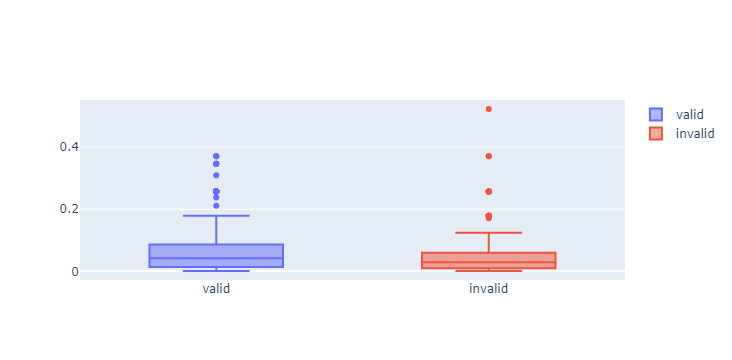

In [27]:
valid = v_df[v_df['valid'] == 1]
invalid = v_df[v_df['valid'] == 0]
data = [go.Box(y=valid['pct_of_frame'], name='valid'),
        go.Box(y=invalid['pct_of_frame'], name='invalid')]
fig = go.Figure(data=data)
fig.show()

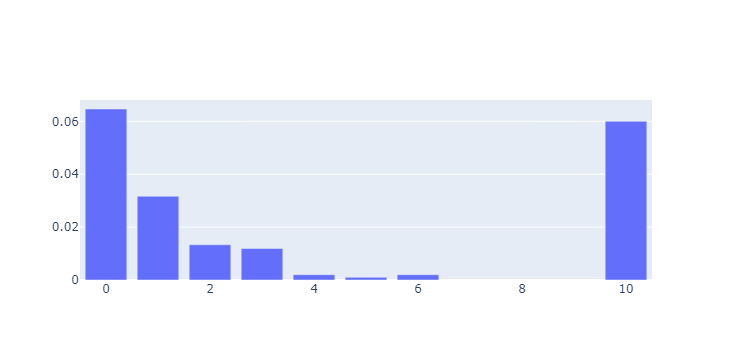

In [28]:
g = v_df[['face_num', 'pct_of_frame']].groupby('face_num').mean()
data = [go.Bar(x=g.index, y=g['pct_of_frame'])]
fig = go.Figure(data=data)
fig.show()

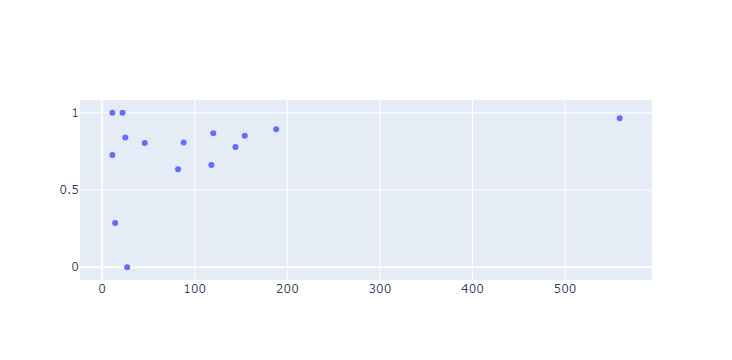

In [29]:
g = v_df[['character', 'valid']].groupby('character').agg(['mean', 'count'])
g = g[g['valid', 'count'] > 10]
data = [go.Scatter(x=g['valid', 'count'], y=g['valid', 'mean'], mode='markers')]
fig = go.Figure(data=data)
fig.show()

In [30]:
g = df[['character', 'valid']].groupby('character').count().sort_values(by='valid', ascending=False)
g

,valid
character,
Dr. Gregory House,559
Dr. Eric Foreman,188
Dr. James Wilson,154
Dr. Robert Chase,144
Dr. Lisa Cuddy,120
...,...
Dr. Wells,0
Dr. Riggin,0
Dr. Pilcher,0


In [34]:
cnt = df['character'].value_counts()[:10]
cnt

character
Dr. Gregory House      116499
Dr. Eric Foreman        35311
Dr. James Wilson        29901
Dr. Robert Chase        28521
Dr. Allison Cameron     27283
Dr. Lisa Cuddy          22942
Dr. Chris Taub          19668
Nurse                   18617
Thirteen                18231
Dr. Lawrence Kutner      6489
Name: count, dtype: int64

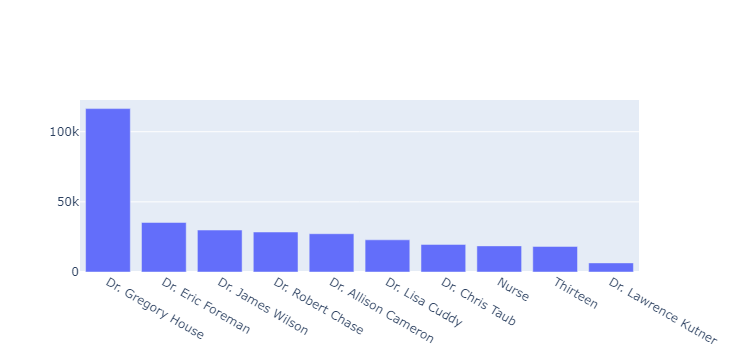

In [35]:
data = [go.Bar(x=cnt.index, y=cnt.values)]
fig = go.Figure(data=data)
fig.show()